In [28]:
import json
import pandas as pd
from pandas import json_normalize
import os
print(os.getcwd())
from src.utils_data import load_data, all_annotation
from matplotlib import pyplot as plt
import seaborn as sns

/home/waissa/recherche/readability/notebooks


In [7]:
classe2CECR = {"Très Facile": "A1", "Facile": "A2", "Accessible": "B1", "+Complexe": "B2"}

In [19]:
global_df, local_df = load_data(file_path='../data', global_file='Qualtrics_Annotations_B.csv', local_file='annotations.json')

Index(['text', 'annotations'], dtype='object')


In [43]:
global_df, local_df = load_data(file_path='../data', global_file='Qualtrics_Annotations_B.csv', local_file='annotations_completes_thib.xlsx')

Index(['text', 'annotations'], dtype='object')


In [45]:
local_df.iloc[0].annotations

[{'text': '#Episode1', 'label': 'Graphie, problème de déchiffrage'},
 {'text': 'intimes,', 'label': 'Mot difficile ou inconnu'},
 {'text': 'baignés de', 'label': 'Mot difficile ou inconnu'},
 {'text': '"technique"', 'label': 'Graphie, problème de déchiffrage'},
 {'text': 'narration', 'label': 'Mot difficile ou inconnu'},
 {'text': "A l'écoute des désirs de lecture de chacun et chacune",
  'label': "Trop d'informations secondaires"},
 {'text': 'sur leurs désirs de lecture,',
  'label': "Trop d'informations secondaires"},
 {'text': 'semaine de résidence,', 'label': 'Mot difficile ou inconnu'},
 {'text': 'résidence', 'label': 'Référence culturelle difficile'},
 {'text': 'forte de toutes ces rencontres,',
  'label': "Trop d'informations secondaires"},
 {'text': 'forte de toutes ces rencontres, et prête à se mettre au travail, pour proposer bientôt une première trame de son texte.',
  'label': 'Ordre syntaxique inhabituel'},
 {'text': 'RDV', 'label': 'Graphie, problème de déchiffrage'},
 {'

In [38]:
df_all_annotations = all_annotation(local_df)
df_all_annotations

,text,label,gold_score_20_label,text_indice
0,#Episode1,"Graphie, problème de déchiffrage",Accessible,229
1,"intimes,",Mot difficile ou inconnu,Accessible,229
2,baignés de,Mot difficile ou inconnu,Accessible,229
3,"""technique""","Graphie, problème de déchiffrage",Accessible,229
4,narration,Mot difficile ou inconnu,Accessible,229
...,...,...,...,...
10454,soufflé,Mot difficile ou inconnu,Facile,920
10455,soufflé au fromage,Mot difficile ou inconnu,Facile,920
10456,croisés,Mot difficile ou inconnu,Facile,920
10457,s’extraire,"Graphie, problème de déchiffrage",Facile,920


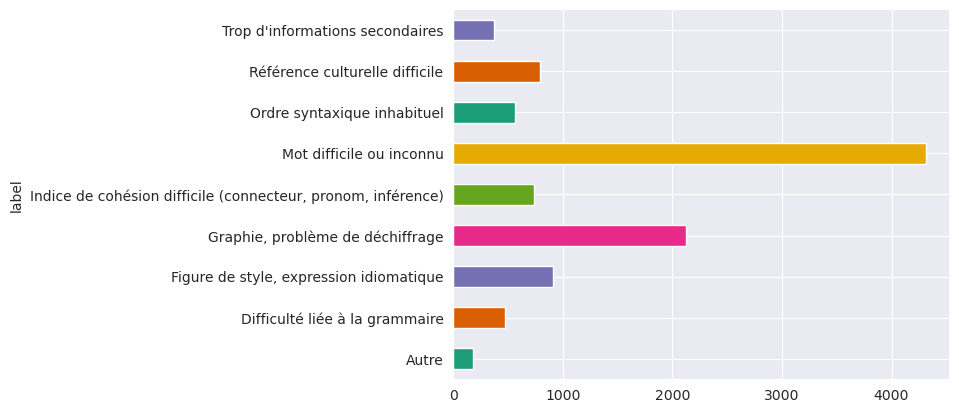

In [39]:
df_all_annotations.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [11]:
# Load local JSON annotations
with open('../data/annotations.json', 'r') as f:
    json_data = json.load(f)
local_df = pd.DataFrame(json_data)

# Load global annotations
file_path = '../data/Qualtrics_Annotations_B_1_1.csv'
global_df = pd.read_csv(file_path, index_col="text_indice", delimiter="\t")
global_df = global_df[~global_df.index.duplicated(keep='first')]
global_df = global_df[['text', 'gold_score_20_label']]
global_df['classe'] = global_df['gold_score_20_label'].map(classe2CECR)

# Match texts and assign labels
indexes = []
for local_text in local_df['text']:
    matching_indexes = global_df[global_df['text'] == local_text].index.tolist()
    indexes.append(matching_indexes[0] if matching_indexes else -1)

local_df['text_indice'] = indexes
local_df['gold_score_20_label'] = local_df['text_indice'].apply(
    lambda x: global_df.at[x, 'gold_score_20_label'] if x != -1 else None
)
local_df['classe'] = local_df['gold_score_20_label'].map(classe2CECR)

In [12]:
global_df['gold_score_20_label'].value_counts()

gold_score_20_label
Facile         212
Accessible     198
+Complexe       32
Très Facile     19
Name: count, dtype: int64

In [13]:
df_annotations_all = local_df['annotations'].apply(lambda x: json_normalize(x))
df_all_annotations = pd.concat([df for df in df_annotations_all], ignore_index=True)

In [14]:
df_all_annotations

,text,start,end,label,annotators,confidence
0,collectif,209,218,Mot difficile ou inconnu,[VAV],0.33
1,faciès.,619,626,Mot difficile ou inconnu,"[EMD, VAV, VIL]",1.00
2,antiraciste.,78,90,"Graphie, problème de déchiffrage",[VIL],0.33
3,elle ne s'en donne pas les moyens.,747,781,Ordre syntaxique inhabituel,[VAV],0.33
4,moyens.,774,781,"Graphie, problème de déchiffrage",[EMD],0.33
...,...,...,...,...,...,...
8980,Ingrédients,180,191,"Graphie, problème de déchiffrage",[VAV],0.33
8981,Ingrédients,180,191,Mot difficile ou inconnu,[VIL],0.33
8982,brin,235,239,Mot difficile ou inconnu,[VAV],0.33
8983,millilitres,255,266,Mot difficile ou inconnu,[VIL],0.33


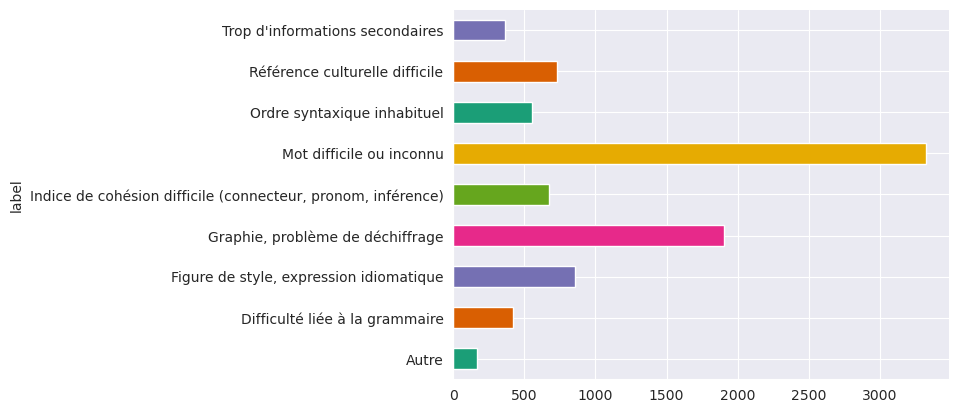

In [15]:
# @title label

from matplotlib import pyplot as plt
import seaborn as sns
df_all_annotations.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

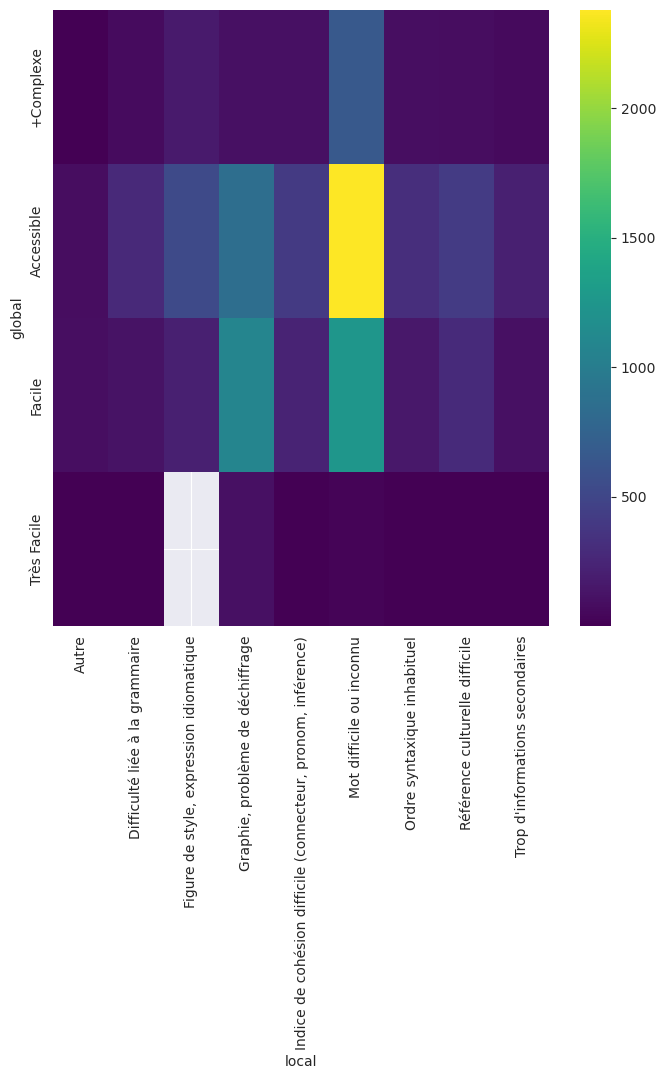

In [40]:
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['gold_score_20_label'].value_counts()
    for x_label, grp in df_all_annotations.groupby('label')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('label')
_ = plt.ylabel('global')
_ = plt.xlabel('local')

In [41]:
df_all_annotations.columns

Index(['text', 'label', 'gold_score_20_label', 'text_indice'], dtype='object')

In [16]:
# Apply json_normalize to each row of the annotations column and keep gold_score_20_label
def normalize_annotations(row):
    annotations_df = json_normalize(row['annotations'])
    # Repeat the gold_score_20_label for each annotation in the row
    annotations_df['gold_score_20_label'] = row['gold_score_20_label']
    return annotations_df

# Apply the normalization function to each row and combine the results
df_annotations_all = local_df.apply(normalize_annotations, axis=1)

# Concatenate all the DataFrames into a single DataFrame
df_all_annotations = pd.concat(df_annotations_all.tolist(), ignore_index=True)


In [17]:
df_all_annotations

,text,start,end,label,annotators,confidence,gold_score_20_label
0,collectif,209,218,Mot difficile ou inconnu,[VAV],0.33,Accessible
1,faciès.,619,626,Mot difficile ou inconnu,"[EMD, VAV, VIL]",1.00,Accessible
2,antiraciste.,78,90,"Graphie, problème de déchiffrage",[VIL],0.33,Accessible
3,elle ne s'en donne pas les moyens.,747,781,Ordre syntaxique inhabituel,[VAV],0.33,Accessible
4,moyens.,774,781,"Graphie, problème de déchiffrage",[EMD],0.33,Accessible
...,...,...,...,...,...,...,...
8980,Ingrédients,180,191,"Graphie, problème de déchiffrage",[VAV],0.33,Facile
8981,Ingrédients,180,191,Mot difficile ou inconnu,[VIL],0.33,Facile
8982,brin,235,239,Mot difficile ou inconnu,[VAV],0.33,Facile
8983,millilitres,255,266,Mot difficile ou inconnu,[VIL],0.33,Facile


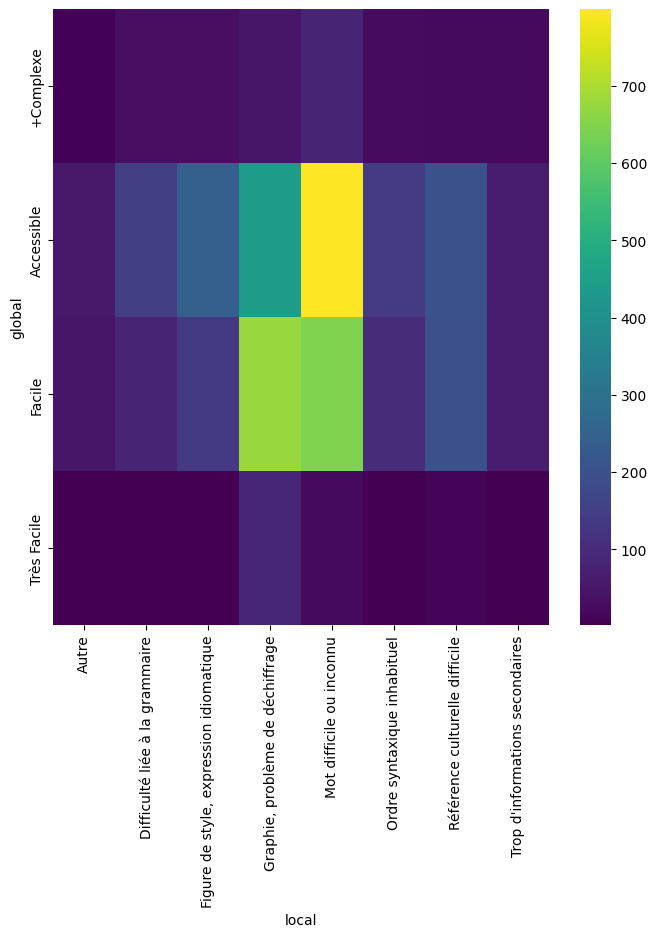

In [44]:
# @title label vs gold_score_20_label

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['gold_score_20_label'].value_counts()
    for x_label, grp in df_all_annotations.groupby('label')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('label')
_ = plt.ylabel('global')
_ = plt.xlabel('local')

In [45]:
df_2dhist

,Autre,Difficulté liée à la grammaire,"Figure de style, expression idiomatique","Graphie, problème de déchiffrage",Mot difficile ou inconnu,Ordre syntaxique inhabituel,Référence culturelle difficile,Trop d'informations secondaires
gold_score_20_label,,,,,,,,
+Complexe,6,33,33,46,80,24,23,23
Accessible,53,151,239,438,799,142,201,65
Facile,48,80,135,676,646,99,196,62
Très Facile,3,3,4,89,21,5,9,2


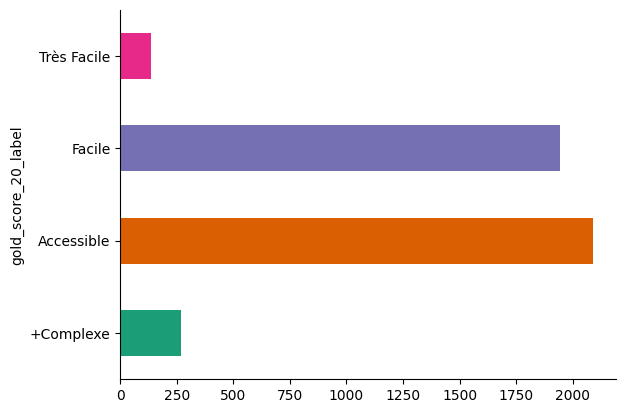

In [42]:
# @title gold_score_20_label

from matplotlib import pyplot as plt
import seaborn as sns
df_all_annotations.groupby('gold_score_20_label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)